In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

In [26]:
import pandas as pd

In [27]:
import math

In [28]:
import imageio
from pathlib import Path

In [29]:
pd.options.mode.chained_assignment = None # gets rid of pandas warning message  

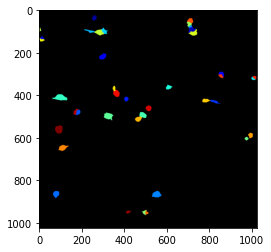

In [30]:
img1 = mpimg.imread('profiler_images/D7_010_I5_Before00000000_Overlay.png')
fig, ax = plt.subplots()

ax.imshow(img1)

plt.show()

In [31]:
# loading and formating data into dataframe
df = pd.read_csv('csvs/FilterObjects.csv')
df = df.rename(columns={'Location_Center_X': 'x', 'Location_Center_Y': 'y'})
df = df[['x', 'y', 'ImageNumber']]
df['z'] = df['ImageNumber']
df['id'] = [0] * len(df.index)
df

,x,y,ImageNumber,z,id
0,259.283981,36.941748,1,1,0
1,711.103672,49.295896,1,1,0
2,704.746269,65.026866,1,1,0
3,709.737931,77.317241,1,1,0
4,3.650350,92.020979,1,1,0
...,...,...,...,...,...
5810,227.107143,503.702381,188,188,0
5811,237.622222,519.983838,188,188,0
5812,565.037464,590.541787,188,188,0
5813,35.653433,657.738197,188,188,0


In [32]:
# adjustable parameters

# scale z to determine how much the z dimension impacts the euclidean distance formula
df.z *= 5

# max distance that two centroids can be apart from each other and be grouped together
THRESHOLD = 20

In [33]:
def dist(row_1, row_2): # basic 3-d euclidean distance calculation
    x = (row_1[0] - row_2[0])**2
    y = (row_1[1] - row_2[1])**2
    z = (row_1[3] - row_2[3])**2
    return math.sqrt(x + y + z)

In [34]:
def label_cells(df):
    d = df.values.tolist()
    idd = 1
    for i, row_1 in enumerate(d):
        if row_1[4] == 0: # new cell, assign it a group id
            row_1[4] = idd
            idd += 1
        image_1 = row_1[3]
        for j, row_2 in enumerate(d):
            image_2 = row_2[3]
            if image_2 <= image_1: # only look at slices that are ahead of this slice
                continue
            if row_2[4] != 0: # disregard cells that already have a group
                continue
            distance = dist(row_1, row_2)
            if distance < THRESHOLD: # dist less than thresh, assign to group
                row_2[4] = row_1[4]     
    return d # returns dataframe in a list of lists format

In [35]:
def show_cell_ids(d, slice_numbers):
    for slice_number in slice_numbers:
        # slice number should be 1 more than the number on the path
        zeros = '0' * (52 - (44+len(str(slice_number-1))))
        img_path = f'profiler_images/D7_010_I5_Before{zeros+str(slice_number-1)}_Overlay.png'
        print(img_path)
        img = mpimg.imread(img_path)
        fig, ax = plt.subplots()
        ax.imshow(img)

        for r in d:
            if r[2] == slice_number: # analyze rows that are in the passed in image
                x = r[0]
                y = r[1]
                idd = str(r[4])
                plt.text(x, y, idd, color='white')

        plt.show()

In [57]:
def save_cell_ids(d):
    for i in range(1, 189):
        if i-1 == 126: # no image labeled 126
            continue
        zeros = '0' * (52 - (44+len(str(i-1))))
        img_path = f'profiler_images/D7_010_I5_Before{zeros+str(i-1)}_Overlay.png'
        img = mpimg.imread(img_path)
        fig, ax = plt.subplots()
        ax.imshow(img)

        for r in d:
            if r[2] == i: # analyze rows that are in the passed in image
                x = r[0]
                y = r[1]
                idd = str(r[4])
                plt.text(x, y, idd, color='white', fontweight=900)
        fig.savefig(f'labeled_images/{i-1}.png')
        plt.close(fig)

In [55]:
def save_cell_ids_orig(d):
    for i in range(1, 189):
        if i-1 == 126: # no image labeled 126
            continue
        zeros = '0' * (52 - (44+len(str(i-1))))
        img_path = f'original_images/D7_010_I5_Before{zeros+str(i-1)}.jpg'
        img = mpimg.imread(img_path)
        fig, ax = plt.subplots()
        ax.imshow(img)

        for r in d:
            if r[2] == i: # analyze rows that are in the passed in image
                x = r[0]
                y = r[1]
                idd = str(r[4])
                plt.text(x, y, idd, color='white', fontweight=900)
        fig.savefig(f'labeled_images_orig/{i-1}.png')
        plt.close(fig)

In [69]:
def save_as_gif():
    image_path = Path('labeled_images')
    images = list(image_path.glob('*.png'))
    image_list = []
    for file_name in sorted(images, key=lambda f: int(str(f)[15:-4])):
        image_list.append(imageio.imread(file_name))
    imageio.mimwrite('labeled7.gif', image_list, fps=1)

In [71]:
def save_as_gif_orig():
    image_path = Path('labeled_images_orig')
    images = list(image_path.glob('*.png'))
    image_list = []
    for file_name in sorted(images, key=lambda f: int(str(f)[20:-4])):
        image_list.append(imageio.imread(file_name))
    imageio.mimwrite('labeled8.gif', image_list, fps=1)

In [39]:
def count_cells(d):
    # finds the max id, this is the count of unique cells detected
    max_id = -1
    for r in d:
        if r[4] > max_id:
            max_id = r[4]
    return max_id

In [40]:
d = label_cells(df) # takes about 20 seconds to run

In [41]:
count_cells(d)

254

In [70]:
save_as_gif() # save the labeled images to a gif

In [72]:
save_as_gif_orig() # save the labeled images using original images to a gif

profiler_images/D7_010_I5_Before00000000_Overlay.png


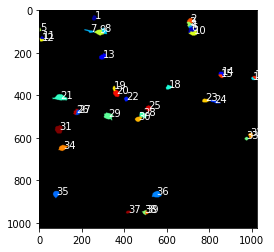

In [48]:
slice_num = [1] # put any image numbers in to see labeled cells with their ids (image indices starts at 1)

show_cell_ids(d, slice_num)

In [56]:
save_cell_ids_orig(d) # saves all the labeled images using the base original images

In [58]:
save_cell_ids(d) # saves all the labeled images using the base filtered images